In [2]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
import spotipy
import spotipy.util as util


from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth

In [4]:
# Declare the credentials by creating a Spotify app here: https://developer.spotify.com
cid = 'your client-id'
secret = 'client-secret'
redirect_uri='http://localhost:8080/callback' # example
username = 'username' # This will work but the newer Spotify API requires you to use tokens -- obtained from the app created


In [6]:
# Authorization flow
scope = 'user-top-read'
token = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

In [8]:
# Fetch the top-10 songs of the user
if token:
    sp = spotipy.Spotify(auth=token)
    results = sp.current_user_top_tracks(limit=50,offset=0,time_range='medium_term')
    for song in range(50):
        list = []
        list.append(results)
        with open('top50_data.json', 'w', encoding='utf-8') as f:
            json.dump(list, f, ensure_ascii=False, indent=4)
else:
    print("Can't get token for", username)

In [10]:
# Open the JSON file to Python objects
with open('top50_data.json') as f:
    data = json.load(f)

In [12]:
len(data[0]['items'])

50

In [14]:
list_of_results = data[0]["items"]
list_of_artist_name = []
list_of_artist_uri = []
list_of_song_names = []
list_of_song_uri = []
list_of_durations_ms = []
list_of_explicit = []
list_of_albums = []
list_of_popularity = []

for result in list_of_results:
    result["album"]
    this_artist_name = result["artists"][0]["name"]
    list_of_artist_name.append(this_artist_name)
    this_artists_uri = result["artists"][0]["uri"]
    list_of_artist_uri.append(this_artists_uri)
    list_of_songs = result["name"]
    list_of_song_names.append(list_of_songs)
    song_uri = result["uri"]
    list_of_song_uri.append(song_uri)
    list_of_duration = result["duration_ms"]
    list_of_durations_ms.append(list_of_duration)
    song_explicit = result["explicit"]
    list_of_explicit.append(song_explicit)
    this_album = result["album"]["name"]
    list_of_albums.append(this_album)
    song_popularity = result["popularity"]
    list_of_popularity.append(song_popularity)

In [16]:
# Convert the pulled content to a pandas df
all_songs = pd.DataFrame(
    {'artist': list_of_artist_name,
     'artist_uri': list_of_artist_uri,
     'song': list_of_song_names,
     'song_uri': list_of_song_uri,
     'duration_ms': list_of_durations_ms,
     'explicit': list_of_explicit,
     'album': list_of_albums,
     'popularity': list_of_popularity
     
    })

In [18]:
all_songs.sort_values('popularity', ascending=False)

,artist,artist_uri,song,song_uri,duration_ms,explicit,album,popularity
40,Billie Eilish,spotify:artist:6qqNVTkY8uBg9cP3Jd7DAH,BIRDS OF A FEATHER,spotify:track:6dOtVTDdiauQNBQEDOtlAB,210373,False,HIT ME HARD AND SOFT,94
45,Ed Sheeran,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V,Perfect,spotify:track:0tgVpDi06FyKpA1z0VMD4v,263400,False,÷ (Deluxe),88
12,Ed Sheeran,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V,Shape of You,spotify:track:7qiZfU4dY1lWllzX7mPBI3,233712,False,÷ (Deluxe),88
2,Ariana Grande,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR,we can't be friends (wait for your love),spotify:track:51ZQ1vr10ffzbwIjDCwqm4,228639,False,eternal sunshine,87
31,Sabrina Carpenter,spotify:artist:74KM79TiuVKeVCqs8QtB0B,Taste,spotify:track:5G2f63n7IPVPPjfNIGih7Q,157279,False,Short n' Sweet,86
25,Sabrina Carpenter,spotify:artist:74KM79TiuVKeVCqs8QtB0B,Espresso,spotify:track:2HRqTpkrJO5ggZyyK6NPWz,175459,True,Short n' Sweet,85
18,Sabrina Carpenter,spotify:artist:74KM79TiuVKeVCqs8QtB0B,Please Please Please,spotify:track:2tHwzyyOLoWSFqYNjeVMzj,186365,True,Short n' Sweet,83
29,Hozier,spotify:artist:2FXC3k01G6Gw61bmprjgqS,Too Sweet,spotify:track:19XpFsce28aByvCC4g89tJ,251424,False,Unreal Unearth: Unaired,82
10,Bill Withers,spotify:artist:1ThoqLcyIYvZn7iWbj8fsj,Lovely Day,spotify:track:0bRXwKfigvpKZUurwqAlEh,254560,False,Menagerie,80
30,Commodores,spotify:artist:6twIAGnYuIT1pncMAsXnEm,Easy,spotify:track:1JQ6Xm1JrvHfvAqhl5pwaA,256426,False,Commodores,79


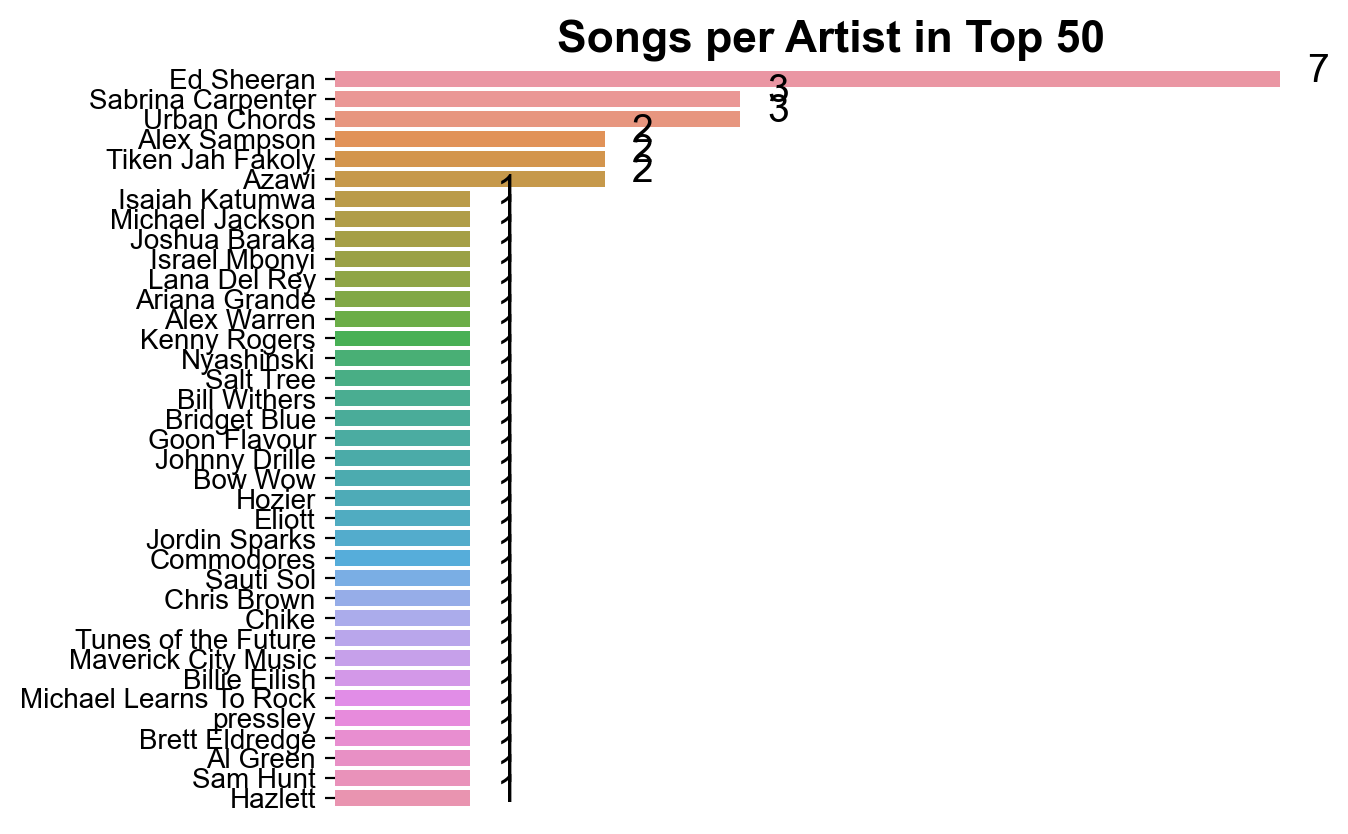

In [20]:
descending_order = all_songs['artist'].value_counts().sort_values(ascending=False).index
ax = sns.countplot(y = all_songs['artist'], order=descending_order)

sns.despine(fig=None, ax=None, top=True, right=True, left=False, trim=False)
sns.set(rc={'figure.figsize':(14,17)})

ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_title('Songs per Artist in Top 50', fontsize=16, fontweight='heavy')
sns.set(font_scale = 1.4)
ax.axes.get_xaxis().set_visible(False)
ax.set_frame_on(False)

y = all_songs['artist'].value_counts()
for i, v in enumerate(y):
    ax.text(v + 0.2, i + .16, str(v), color='black', fontweight='light', fontsize=14)
    
plt.show()
sns.set()

In [1]:
# Requires: openai >= 1.60.0
# Run: pip install --upgrade openai

from openai import OpenAI

# Create an OpenAI client (replace with your real key or env var)
# OpenAI key can be obtained from: https://platform.openai.com/
client = OpenAI(api_key="Your OPENAI Key Here")

# Conversation state
# Start with a "system" instruction as a *string* (not a list)
system_prompt = "You are an intelligent assistant. Make sure you stay within 10 words."

# Keep every turn as a simple string in `history`
history = [f"System: {system_prompt}"]

# Interactive loop
print("Type your messages. Type 'bye' to exit.\n")

while True:
    user_msg = input("User: ").strip()
    if not user_msg:
        continue
    if user_msg.lower() == "bye":
        print("GPT-5: Goodbye 👋")
        break

    # Save the user input
    history.append(f"User: {user_msg}")

    # Join the transcript into one big text block
    prompt = "\n".join(history)

    try:
        # Send the prompt to GPT-5
        response = client.responses.create(
            model="gpt-5",
            input=prompt,
            reasoning={"effort": "medium"},  # optional
            text={"verbosity": "medium"}     # optional
        )

        # Get the assistant’s text
        reply = response.output_text.strip()

        print(f"GPT-5: {reply}\n")

        # Save assistant reply for context in the next turn
        history.append(f"Assistant: {reply}")

    except Exception as e:
        print("Error:", e)
        break


Type your messages. Type 'bye' to exit.



User:  bye


GPT-5: Goodbye 👋
